This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

To provide sufficient context for introducing tensors and gradient descent, we’ll begin the
chapter with a practical example of a neural network. Then we’ll go over every new concept
that’s been introduced, point by point.

## A first look at a neural network

The problem we’re trying to solve here is to classify grayscale images of handwritten digits ($28 \times
28$ pixels) into their $10$ categories ($0$ through $9$). We’ll use the MNIST dataset, a classic in the
machine-learning community, which has been around almost as long as the field itself and has
been intensively studied. It’s a set of $60,000$ training images, plus $10,000$ test images, assembled
by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You
can think of "solving" MNIST as the "Hello World" of deep learning—it’s what you do to verify
that your algorithms are working as expected.

**Loading the MNIST dataset in Keras**

The MNIST dataset comes preloaded in Keras, in the form of a set of four NumPy arra

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

The workflow will be as follows: First, we’ll feed the neural network the training data, `train_images` and `train_labels`. The network will then learn to associate images and labels. Finally, we’ll ask the network to produce predictions for `test_images`, and we’ll verify whether these predictions match the labels from `test_labels`.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

The core building block of neural networks is the **layer**. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

Here, our model consists of a sequence of two `Dense` layers, which are densely connected (also
called **fully connected**) neural layers. The second (and last) layer is a $10$-way **softmax
classification** layer, which means it will return an array of $10$ probability scores (summing to $1$).
Each score will be the probability that the current digit image belongs to one of our $10$ digit classes.

**The compilation step**

To make the model ready for training, we need to pick three more things, as part of the **compilation** step:

- An **optimizer**—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
- A **loss function**—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction. 
- **Metrics** to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [11]:
import numpy as np

# what does our data look like?
train_images[0].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

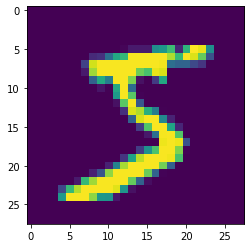

In [12]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0]/255)

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the interval $[0, 1]$. Previously, our training images were stored in an array of shape $(60000, 28, 28)$ of type `uint8` with values in the $[0, 255]$ interval. We transform it into a `float32` array of shape $(60000, 28 * 28)$ with values between $0$ and $1$.

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

We’re now ready to train the model, which in Keras is done via a call to the model’s `fit()` method—we fit the model to its training data:

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2577 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1029 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9887


Two quantities are displayed during training: the **loss** of the model over the training data, and the **accuracy** of the model over the training data. We quickly reach an accuracy of $0.989$ ($98.9\%$) on the training data.

**Using the model to make predictions**

Now that we have a trained model, you can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([1.1749762e-09, 2.1895223e-11, 2.6694752e-07, 3.7771504e-05,
       1.5018131e-11, 1.8865355e-08, 1.7704255e-15, 9.9996138e-01,
       3.5823991e-08, 5.7900201e-07], dtype=float32)

In [16]:
predictions[0].argmax()

7

In [17]:
predictions[0][7]

0.9999614

In [18]:
test_labels[0]

7

**Evaluating the model on new data**

On average, how good is our model at classifying such never-seen-before digits? Let’s check by computing average accuracy over the entire test set.

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9785
test_acc: 0.9785000085830688


This concludes our first example—you just saw how you can build and train a neural network to classify handwritten digits in less than 15 lines of Python code. In this chapter and the next, we’ll go into detail about every moving piece we just previewed and clarify what’s going on behind the scenes. You’ll learn about tensors, the data-storing objects going into the model; tensor operations, which layers are made of; and gradient descent, which allows your model to learn from its training examples.